<a href="https://colab.research.google.com/github/Yamito548/Trabajos-cursos-IA-y-big-data/blob/main/act_3_5_calidad_vinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este trabajo usaremos árboles de decisión para predecir la calidad de los vinos. Los dataset se descargaron [aquí](https://archive.ics.uci.edu/dataset/186/wine+quality).

# Importamos el dataset.

In [ ]:
#(5%) Importación de los datasets (utilizar el dataset winequality-red.csv)
import pandas as pd
data = pd.read_csv("winequality-red.csv")
data

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
...,...
1594,6.2;0.6;0.08;2;0.09;32;44;0.9949;3.45;0.58;10.5;5
1595,5.9;0.55;0.1;2.2;0.062;39;51;0.99512;3.52;0.76...
1596,6.3;0.51;0.13;2.3;0.076;29;40;0.99574;3.42;0.7...
1597,5.9;0.645;0.12;2;0.075;32;44;0.99547;3.57;0.71...


Podemos ver que hay 1599 filas, y sola una columna (en  realidad 12 separadas) en donde están todas las características juntas separadas por “;”.Todas las características están relacionadas a los vinos en si desde su acidez hasta su pH. Pero igual tendré que buscar un método para separar las características.

# Otra forma de cargar los datos (solución al problema anterior)

In [ ]:
from google.colab import files
import io
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')),sep=";")
    return df
#Al principio no me funciona bien pero al añadir sep=";" ya funcionó correctamente

In [ ]:
data = upload_files()
data = pd.DataFrame(data)
data

Saving winequality-red.csv to winequality-red (1).csv
User uploaded file "winequality-red (1).csv" with length 84199 bytes


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report
import numpy as np

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    print("Metrics \n"
      +classification_report(y_true, y_pred))

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = [str(class_) for class_ in classes]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


# Matriz de correlación

<Axes: >

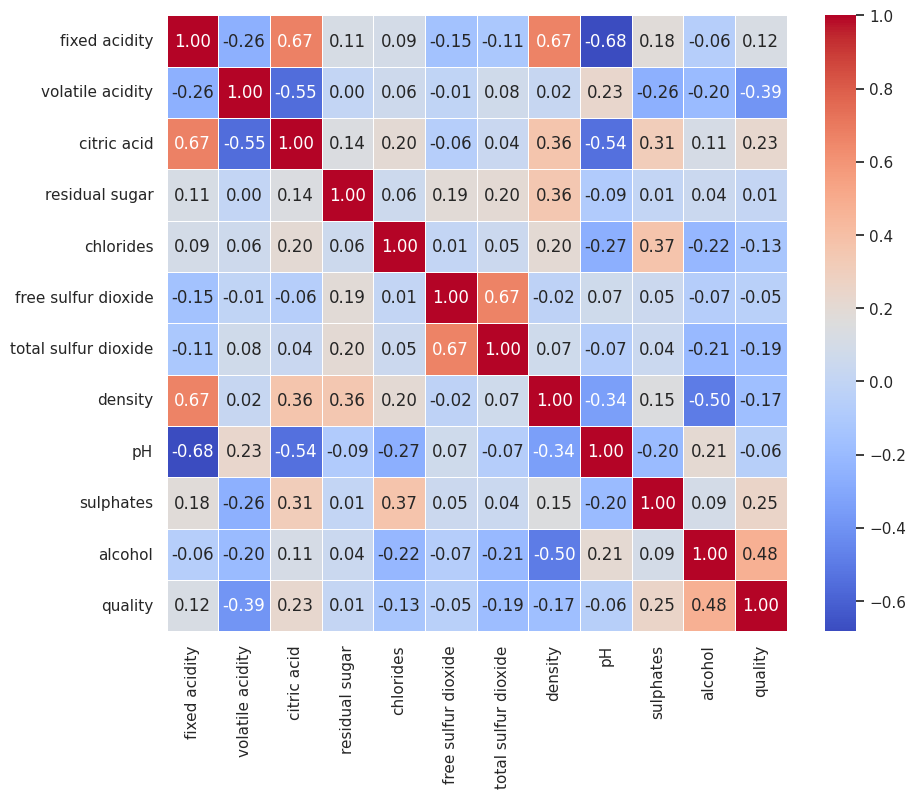

In [ ]:
#(5%) Mostrar la matriz de correlación de variables.
import seaborn as sns
import matplotlib.pyplot as plt
matriz_corr = data.corr()
sns.set(style='white')
plt.figure(figsize=(10,8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

Aquí podremos ver como se relación todas las características entre ellas. A primera vista vemos que no hay ninguna característica la cual se lleve súper bien con otra pero veo buenos números igualmente como 0.67 que a primera vista es el valor más alto de correlación. Hay que recordar que para esta matriz los valores que nos muestran estan entre -1 y 1, siendo -1 una muy mala correlación y 1 una muy buena.

# Selección de características

kbest

In [ ]:
#(5%) Aplicar cualquier otra técnica de selección de características que consideres adecuados y justificar tu propuesta.
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#Dividimos los datos
X = data.drop("quality",axis=1)
y = data["quality"]
modelo = GaussianNB()
#Vemos los resultados que nos da con diferentes cantidades de características.

for n in range(2,5):
  k_best = SelectKBest(score_func=f_classif, k=n)
  X_best = k_best.fit_transform(X,y)
  select_column = X.columns[k_best.get_support()]
  X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.20, random_state=100)
  modelo.fit(X_train,y_train)
  y_pred = modelo.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Las características seleccionadas para {n} son: {select_column}")
  print(f"La precisión es de {accuracy}")

Las características seleccionadas para 2 son: Index(['volatile acidity', 'alcohol'], dtype='object')
La precisión es de 0.58125
Las características seleccionadas para 3 son: Index(['volatile acidity', 'total sulfur dioxide', 'alcohol'], dtype='object')
La precisión es de 0.6375
Las características seleccionadas para 4 son: Index(['volatile acidity', 'total sulfur dioxide', 'sulphates', 'alcohol'], dtype='object')
La precisión es de 0.621875


En este caso, la mayor precisión nos la da cuando solo hay 3 características las cuales son volatile acidity, total sulfur dioxide y alcohol dandonos un porcentaje de 0.63%. Luego de esto, a más características añadamos peores resultados nos va a dar.

RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import pandas as pd
clf = RandomForestClassifier(n_estimators=100, random_state=42)
# Entrenar el clasificador
clf.fit(X, y)
# Seleccionar características basadas en la importancia de RandomForest
sfm = SelectFromModel(clf, threshold=0.1)  # threshold es un hiperparámetro que puedes ajustar
X_selected = sfm.fit_transform(X, y)
# Imprimir las características seleccionadas
print("Número de características originales:", X.shape[1])
print("Número de características seleccionadas:", X_selected.shape[1])

# Filtrar los nombres de las características originales para obtener los nombres de las características seleccionadas
selected_feature_names = X.columns[sfm.get_support()]

# Imprimir los nombres de las características seleccionadas
print(f"Características seleccionadas: {selected_feature_names}")

#Vamos a probar la precisión del modelo.
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.20, random_state=100)
modelo.fit(X_train,y_train)
y_pred = modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"La precisión del modelo es de {accuracy}")

Número de características originales: 11
Número de características seleccionadas: 4
Características seleccionadas: Index(['volatile acidity', 'total sulfur dioxide', 'sulphates', 'alcohol'], dtype='object')
La precisión del modelo es de 0.621875


Ahora he utilizado una técnica de árboles que nunca había usado. En este caso yo no le he indicado cuantas características quería probar sino que el randomforest lo calcula y me muestra el resultado. En este caso me dio una característica más que el kbest, dándome el mismo resultado para 4 características que me daba el kbest, es exactamente el mismo número. Por ahora usaré las 3 características que me dió el kbest, simplemente porque me da un poco mejor el resultado. Igualmente mi intención es también probar con 4 características para ver si hay diferencias a la hora de usarlo. También probé otro método llamado LASSO pero me dio resultados muy malos por lo que decidí no añadirlo.

In [ ]:
k_best = SelectKBest(score_func=f_classif, k=3)
X_best = k_best.fit_transform(X,y)
select_column = X.columns[k_best.get_support()]
X_best = pd.DataFrame(X_best, columns=select_column)
X_best

,volatile acidity,total sulfur dioxide,alcohol
0,0.700,34.0,9.4
1,0.880,67.0,9.8
2,0.760,54.0,9.8
3,0.280,60.0,9.8
4,0.700,34.0,9.4
...,...,...,...
1594,0.600,44.0,10.5
1595,0.550,51.0,11.2
1596,0.510,40.0,11.0
1597,0.645,44.0,10.2


Creamos el dataframe con las características con mejor respuesta.

# Modelos de árboles

In [ ]:
X_best
y = data["quality"]
X_trainb, X_testb, y_trainb, y_testb = train_test_split(X_best, y, test_size=0.20, random_state=100)
X_best

,volatile acidity,total sulfur dioxide,alcohol
0,0.700,34.0,9.4
1,0.880,67.0,9.8
2,0.760,54.0,9.8
3,0.280,60.0,9.8
4,0.700,34.0,9.4
...,...,...,...
1594,0.600,44.0,10.5
1595,0.550,51.0,11.2
1596,0.510,40.0,11.0
1597,0.645,44.0,10.2


In [ ]:
# (10%) Realizar una comparativa de la precisión en el entrenamiento de los diferentes modelos de árboles. Aplicando Cross Validation.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import KFold
names = ["Decision Tree", "Random Forest", 'Gradient Boosting','AdaBoost']
classifiers = [DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), AdaBoostClassifier()]

#Aplicamos el cross validation
kfold = KFold(n_splits=5, shuffle= True, random_state=100)
total_scores = []

for name, clasificador in zip(names,classifiers):
  fold_accuracy = []
  for train_fold, test_fold in kfold.split(X_train):
    #Dividimos los datos
    kf_train_X = X_trainb.iloc[train_fold]
    kf_train_y = y_trainb.iloc[train_fold]
    #Entrenamos el modelo
    clasificador.fit(kf_train_X,kf_train_y)
    #Realizamos la predicción
    y_pred = clasificador.predict(X_trainb.iloc[test_fold])
    acc = accuracy_score(y_trainb.iloc[test_fold], y_pred)
    fold_accuracy.append(acc)
  total_scores.append(sum(fold_accuracy)/len(fold_accuracy))

for n in range(len(names)):
  print(f"Modelo: {names[n]} = {round((total_scores[n]),2)}")

Modelo: Decision Tree = 0.53
Modelo: Random Forest = 0.61
Modelo: Gradient Boosting = 0.58
Modelo: AdaBoost = 0.53


En este caso podemos ver que el mejor modelo, de primeras, sería el random forest. Los otros tampoco es que sean muy malos, si eso el decision Tree que casi llega al 50%, pero el Gradient tampoco esta mal. Pero yo considero que un porcentaje del 61% esta bien, más aún si es solo un modelo para clasifiación de vinos.

# Trabajamos con el modelo

Metrics 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        12
           5       0.78      0.75      0.76       133
           6       0.69      0.69      0.69       137
           7       0.37      0.59      0.46        32
           8       0.00      0.00      0.00         3

    accuracy                           0.67       320
   macro avg       0.31      0.34      0.32       320
weighted avg       0.65      0.67      0.66       320

Confusion matrix, without normalization
[[  0   1   1   1   0   0]
 [  0   0   7   4   1   0]
 [  0   0 100  26   7   0]
 [  1   0  19  95  22   0]
 [  0   0   2  11  19   0]
 [  0   0   0   1   2   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

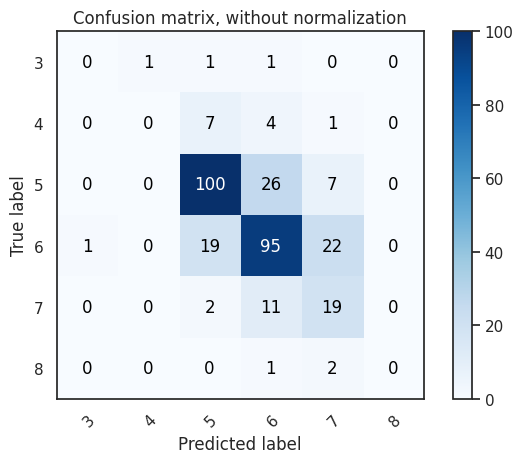

In [ ]:
# Una vez decides el modelo que consideras mejor, entonces realizar las siguientes tareas:
#El que vamos a usar es el random forest (0.61)
# (10%) Entrenarlo y obtener la matriz de confusión.
modelo_arb = RandomForestClassifier()
modelo_arb.fit(X_trainb,y_trainb)
y_pred = modelo_arb.predict(X_testb)
#Vemos la matriz de confisión
plot_confusion_matrix(y_testb, y_pred , classes = unique_labels(y_testb, y_pred), normalize=False)

En la matriz se puede ver la calidad de los vinos y sus datos acertados. Como podemos ver la calidad más común es la 5 y 6 mientras las otras son bastante más bajas.

# Exportamos e importamos el modelo a un fichero.

In [ ]:
# (10%) Exportar a un fichero los parámetros del modelo entrenado.
!pip install joblib

In [ ]:
import sklearn.externals
import joblib
joblib.dump(modelo_arb,'modelo_vinos.pkl')
# Para importar el modelo entrenado y ejecutar de nuevo test
clf_entrenado = modelo_arb.fit(X_trainb,y_trainb)
clf_entrenado = joblib.load('modelo_vinos.pkl')
clf_entrenado.score(X_testb, y_testb) # Obtenemos la precisión

0.66875

In [ ]:
#Importamos el modelo
clf_entrenado = joblib.load('modelo_vinos.pkl')
X_in = np.asarray([0.705,36.0,8.4]).reshape(1,-1)
predicción = clf_entrenado.predict(X_in)
predicción[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


6

Con esto ya hemos importado e exportado el modelo y además lo hemos probado para comprobar si predice bien y teniendo en cuenta que he usado valores los cuales estaban cerca de un registro del dataset pues si puedo decir que funciona correctamente.



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Metrics 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        12
           5       0.78      0.75      0.76       133
           6       0.69      0.69      0.69       137
           7       0.37      0.59      0.46        32
           8       0.00      0.00      0.00         3

    accuracy                           0.67       320
   macro avg       0.31      0.34      0.32       320
weighted avg       0.65      0.67      0.66       320

Confusion matrix, without normalization
[[  0   1   1   1   0   0]
 [  0   0   7   4   1   0]
 [  0   0 100  26   7   0]
 [  1   0  19  95  22   0]
 [  0   0   2  11  19   0]
 [  0   0   0   1   2   0]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

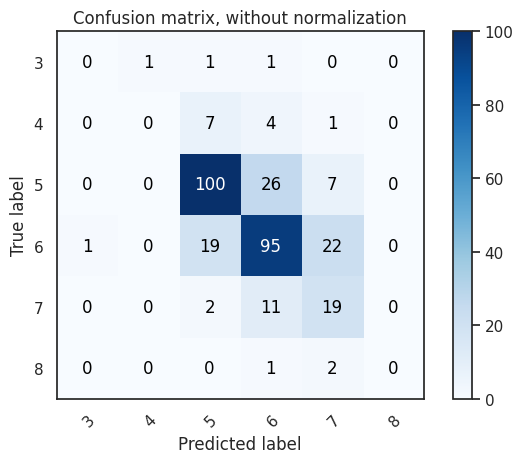

In [ ]:
# (10%) Aplicar el modelo (predict) a todos los datos del dataset y obtener la matriz de confusión.
y_predict = clf_entrenado.predict(X_best)
plot_confusion_matrix(y_testb, y_pred , classes = unique_labels(y_testb, y_pred), normalize=False)

# Probar con dataset de vinos blancos

Cargamos el modelo de vinos blancos

In [ ]:
data2 = upload_files()
data2 = pd.DataFrame(data)
data2

Saving winequality-white.csv to winequality-white (1).csv
User uploaded file "winequality-white (1).csv" with length 264426 bytes


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Matriz de confusión

In [ ]:
#(5%) Mostrar la matriz de correlación de variables.
import seaborn as sns
import matplotlib.pyplot as plt
matriz_corr = data2.corr()
sns.set(style='white')
plt.figure(figsize=(10,8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

Seleccionamos las características

In [ ]:
#(5%) Aplicar cualquier otra técnica de selección de características que consideres adecuados y justificar tu propuesta.
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#Dividimos los datos
X = data2.drop("quality",axis=1)
y = data2["quality"]
modelo = GaussianNB()
#Vemos los resultados que nos da con diferentes cantidades de características.

for n in range(2,5):
  k_best = SelectKBest(score_func=f_classif, k=n)
  X_best = k_best.fit_transform(X,y)
  select_column = X.columns[k_best.get_support()]
  X_trainw, X_testw, y_trainw, y_testw = train_test_split(X_best, y, test_size=0.20, random_state=100)
  modelo.fit(X_trainw,y_trainw)
  y_pred = modelo.predict(X_testw)
  accuracy = accuracy_score(y_testw, y_pred)
  print(f"Las características seleccionadas para {n} son: {select_column}")
  print(f"La precisión es de {accuracy}")

Las características seleccionadas para 2 son: Index(['volatile acidity', 'alcohol'], dtype='object')
La precisión es de 0.58125
Las características seleccionadas para 3 son: Index(['volatile acidity', 'total sulfur dioxide', 'alcohol'], dtype='object')
La precisión es de 0.6375
Las características seleccionadas para 4 son: Index(['volatile acidity', 'total sulfur dioxide', 'sulphates', 'alcohol'], dtype='object')
La precisión es de 0.621875


In [ ]:
#Usamos otro metodo para la selección de variables
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import pandas as pd
clf = RandomForestClassifier(n_estimators=100, random_state=42)
# Entrenar el clasificador
clf.fit(X, y)
# Seleccionar características basadas en la importancia de RandomForest
sfm = SelectFromModel(clf, threshold=0.1)  # threshold es un hiperparámetro que puedes ajustar
X_selected = sfm.fit_transform(X, y)
# Imprimir las características seleccionadas
print("Número de características originales:", X.shape[1])
print("Número de características seleccionadas:", X_selected.shape[1])

# Filtrar los nombres de las características originales para obtener los nombres de las características seleccionadas
selected_feature_names = X.columns[sfm.get_support()]

# Imprimir los nombres de las características seleccionadas
print(f"Características seleccionadas: {selected_feature_names}")

#Vamos a probar la precisión del modelo.
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.20, random_state=100)
modelo.fit(X_train,y_train)
y_pred = modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"La precisión del modelo es de {accuracy}")

Número de características originales: 11
Número de características seleccionadas: 4
Características seleccionadas: Index(['volatile acidity', 'total sulfur dioxide', 'sulphates', 'alcohol'], dtype='object')
La precisión del modelo es de 0.621875


In [ ]:
k_best = SelectKBest(score_func=f_classif, k=3)
X_best = k_best.fit_transform(X,y)
select_column = X.columns[k_best.get_support()]
X_best = pd.DataFrame(X_best, columns=select_column)
X_best

,volatile acidity,total sulfur dioxide,alcohol
0,0.700,34.0,9.4
1,0.880,67.0,9.8
2,0.760,54.0,9.8
3,0.280,60.0,9.8
4,0.700,34.0,9.4
...,...,...,...
1594,0.600,44.0,10.5
1595,0.550,51.0,11.2
1596,0.510,40.0,11.0
1597,0.645,44.0,10.2


In [ ]:
X_best
y = data["quality"]
X_trainb, X_testb, y_trainb, y_testb = train_test_split(X_best, y, test_size=0.20, random_state=100)
X_best

In [ ]:
# (10%) Realizar una comparativa de la precisión en el entrenamiento de los diferentes modelos de árboles. Aplicando Cross Validation.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import KFold
names = ["Decision Tree", "Random Forest", 'Gradient Boosting','AdaBoost']
classifiers = [DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), AdaBoostClassifier()]

#Aplicamos el cross validation
kfold = KFold(n_splits=5, shuffle= True, random_state=100)
total_scores = []

for name, clasificador in zip(names,classifiers):
  fold_accuracy = []
  for train_fold, test_fold in kfold.split(X_train):
    #Dividimos los datos
    kf_train_X = X_trainb.iloc[train_fold]
    kf_train_y = y_trainb.iloc[train_fold]
    #Entrenamos el modelo
    clasificador.fit(kf_train_X,kf_train_y)
    #Realizamos la predicción
    y_pred = clasificador.predict(X_trainb.iloc[test_fold])
    acc = accuracy_score(y_trainb.iloc[test_fold], y_pred)
    fold_accuracy.append(acc)
  total_scores.append(sum(fold_accuracy)/len(fold_accuracy))

for n in range(len(names)):
  print(f"Modelo: {names[n]} = {round((total_scores[n]),2)}")

Modelo: Decision Tree = 0.53
Modelo: Random Forest = 0.62
Modelo: Gradient Boosting = 0.58
Modelo: AdaBoost = 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Metrics 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.50      0.08      0.14        12
           5       0.77      0.76      0.77       133
           6       0.70      0.68      0.69       137
           7       0.35      0.59      0.44        32
           8       0.00      0.00      0.00         3

    accuracy                           0.67       320
   macro avg       0.39      0.35      0.34       320
weighted avg       0.68      0.67      0.66       320

Confusion matrix, without normalization
[[  0   1   2   0   0   0]
 [  0   1   6   4   1   0]
 [  0   0 101  23   9   0]
 [  0   0  20  93  23   1]
 [  0   0   2  11  19   0]
 [  0   0   0   1   2   0]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

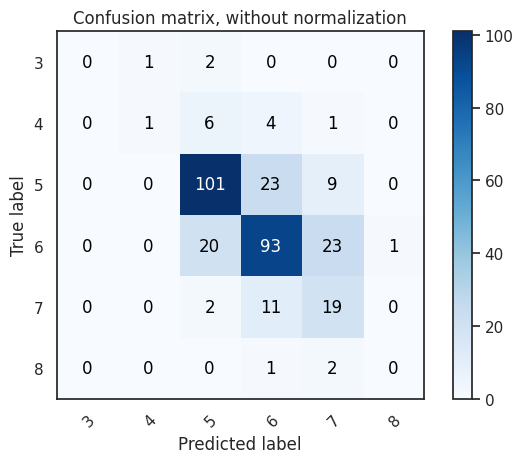

In [ ]:
# Una vez decides el modelo que consideras mejor, entonces realizar las siguientes tareas:
#El que vamos a usar es el random forest (0.61)
# (10%) Entrenarlo y obtener la matriz de confusión.
modelo_arb = RandomForestClassifier()
modelo_arb.fit(X_trainb,y_trainb)
y_pred = modelo_arb.predict(X_testb)
#Vemos la matriz de confisión
plot_confusion_matrix(y_testb, y_pred , classes = unique_labels(y_testb, y_pred), normalize=False)

In [ ]:
#Comprobamos la cantidad de calidades por número que hay.
for calidad in range(3,8+1):
  seis = data["quality"].value_counts().get(calidad,0)
  seis2 = data2["quality"].value_counts().get(calidad,0)
  print(f"""
      En el dataset de vinos rojos hay un total de {seis} vinos de calidad {calidad} mientras que en el de vinos blancos
      hay un total {seis2}.
      """)

Como conclusión de este apartado, puedo decir que los dataset son muy similares, tirando más a que son iguales pero por ciertas diferencias ya mostradas no se podría decir eso. Por lo demás son muy parecidos, tienen las mismas filas y columnas, a nivel de cantidad al menos, y datos similares.